In [29]:
np.random.seed(789)
n_samples = 200
exercise_time = np.random.uniform(0, 10, n_samples)
calorie_intake = np.random.uniform(1500, 3500, n_samples)
body_fat = 30 - 2 * exercise_time + 0.005 * calorie_intake + np.random.normal(0, 3, n_samples)
body_fat = np.clip(body_fat, 5, 50)
health_data = pd.DataFrame({
    'Exercise Time (hours/week)': exercise_time,
    'Calorie Intake (kcal/day)': calorie_intake,
    'Body Fat Percentage (%)': body_fat
})

# I.B.1. Clean your data in Python by identifying and removing null values.
print("Checking for null values:")
print(health_data.isnull().sum())


print("\nData cleaning (checking for nulls) complete.")

Checking for null values:
Exercise Time (hours/week)    0
Calorie Intake (kcal/day)     0
Body Fat Percentage (%)       0
dtype: int64

Data cleaning (checking for nulls) complete.


In [17]:
# I.B.2. Prove that your data is clean and contains at least 100 data points using Python.
num_data_points = len(health_data)
print(f"\nNumber of data points: {num_data_points}")

print("\nNumber of null values after potential cleaning:")
print(health_data.isnull().sum())

if health_data.isnull().sum().sum() == 0 and num_data_points >= 100:
    print("\nData is clean (no null values) and contains at least 100 data points.")
else:
    print("\nData cleaning or data point count needs attention.")


Number of data points: 200

Number of null values after potential cleaning:
Exercise Time (hours/week)    0
Calorie Intake (kcal/day)     0
Body Fat Percentage (%)       0
dtype: int64

Data is clean (no null values) and contains at least 100 data points.


In [19]:
# I.B.3. Process and analyze your data using Python, including at least:

# Five operations using NumPy.
exercise_np = health_data['Exercise Time (hours/week)'].to_numpy()
calorie_np = health_data['Calorie Intake (kcal/day)'].to_numpy()
body_fat_np = health_data['Body Fat Percentage (%)'].to_numpy()

print("\nNumPy Operations:")

# 1. Calculate the mean exercise time
mean_exercise = np.mean(exercise_np)
print(f"   Mean exercise time: {mean_exercise:.2f} hours/week")

# 2. Find the minimum calorie intake
min_calories = np.min(calorie_np)
print(f"   Minimum calorie intake: {min_calories:.2f} kcal/day")

# 3. Calculate the standard deviation of body fat percentage
std_body_fat = np.std(body_fat_np)
print(f"   Standard deviation of body fat: {std_body_fat:.2f} %")

# 4. Find the index of the lowest body fat percentage
argmin_body_fat = np.argmin(body_fat_np)
print(f"   Index of minimum body fat: {argmin_body_fat}")

# 5. Calculate the element-wise sum of exercise time and (scaled) inverse of body fat
# (Adding a small constant to avoid division by zero)
scaled_inverse_fat = 10 / (body_fat_np + 0.1)
combined_metric = np.sum([exercise_np, scaled_inverse_fat], axis=0)[:5] # Showing first 5 elements
print(f"   Sum of exercise and scaled inverse body fat (first 5): {combined_metric}")

# One operation using SciPy.
print("\nSciPy Operation:")
# Calculate the Spearman rank-order correlation between calorie intake and body fat
spearman_corr, spearman_p = stats.spearmanr(health_data['Calorie Intake (kcal/day)'], health_data['Body Fat Percentage (%)'])
print(f"   Spearman correlation (Calorie vs Body Fat): {spearman_corr:.2f}, p-value: {spearman_p:.3f}")

# One operation using Statsmodels.
print("\nStatsmodels Operation:")
# Perform Ordinary Least Squares (OLS) regression to predict body fat from exercise and calories
X = health_data[['Exercise Time (hours/week)', 'Calorie Intake (kcal/day)']]
y = health_data['Body Fat Percentage (%)']
X = sm.add_constant(X)  # Add an intercept term
model = sm.OLS(y, X).fit()
print(model.summary())


NumPy Operations:
   Mean exercise time: 4.97 hours/week
   Minimum calorie intake: 1501.95 kcal/day
   Standard deviation of body fat: 6.88 %
   Index of minimum body fat: 186
   Sum of exercise and scaled inverse body fat (first 5): [ 3.50379586  2.5553544   8.27296321  6.58262879 10.13428043]

SciPy Operation:
   Spearman correlation (Calorie vs Body Fat): 0.32, p-value: 0.000

Statsmodels Operation:
                               OLS Regression Results                              
Dep. Variable:     Body Fat Percentage (%)   R-squared:                       0.785
Model:                                 OLS   Adj. R-squared:                  0.783
Method:                      Least Squares   F-statistic:                     359.1
Date:                     Sun, 18 May 2025   Prob (F-statistic):           1.99e-66
Time:                             10:36:28   Log-Likelihood:                -515.99
No. Observations:                      200   AIC:                             1038.
Df R


Visualizations:


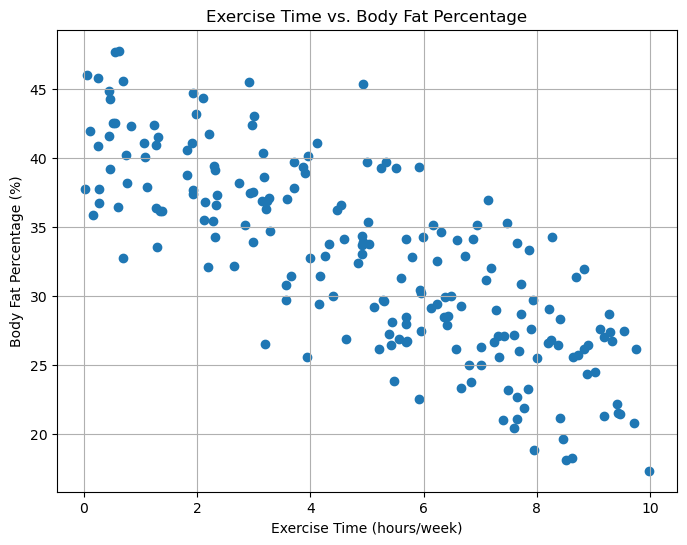

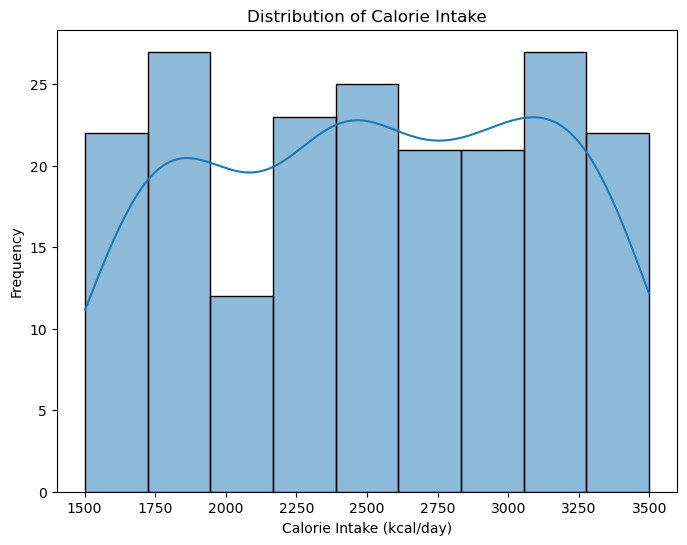

In [21]:
# I.B.4. Create at least two visualizations of your data.
print("\nVisualizations:")

# 1. Scatter plot of Exercise Time vs. Body Fat Percentage
plt.figure(figsize=(8, 6))
plt.scatter(health_data['Exercise Time (hours/week)'], health_data['Body Fat Percentage (%)'])
plt.xlabel("Exercise Time (hours/week)")
plt.ylabel("Body Fat Percentage (%)")
plt.title("Exercise Time vs. Body Fat Percentage")
plt.grid(True)
plt.show()

# 2. Histogram of Calorie Intake
plt.figure(figsize=(8, 6))
sns.histplot(health_data['Calorie Intake (kcal/day)'], kde=True)
plt.xlabel("Calorie Intake (kcal/day)")
plt.ylabel("Frequency")
plt.title("Distribution of Calorie Intake")
plt.show()


Correlation Plot with Regression Line:


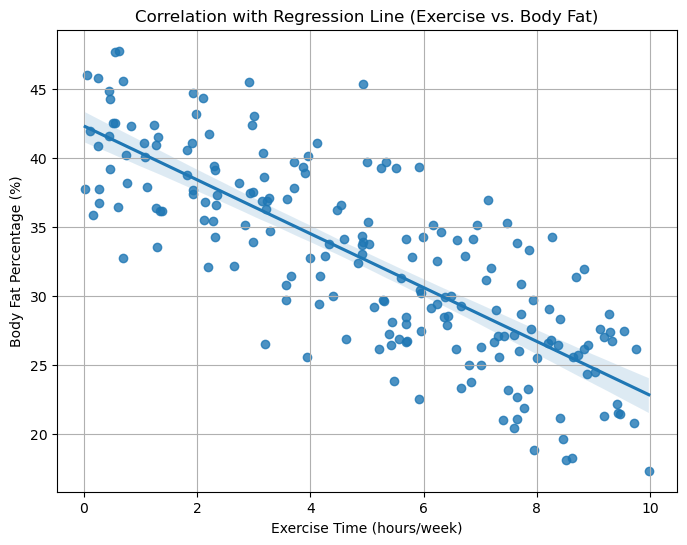

In [23]:
# I.B.5. Create a correlation plot with a regression line.
print("\nCorrelation Plot with Regression Line:")

plt.figure(figsize=(8, 6))
sns.regplot(x='Exercise Time (hours/week)', y='Body Fat Percentage (%)', data=health_data)
plt.title("Correlation with Regression Line (Exercise vs. Body Fat)")
plt.grid(True)
plt.show()